In [1]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# The number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

# Number of words to consider as features
maximum_features = 10000
# After this amount of words, cut the texts
#(among top max_features most common words)
max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maximum_features)

x_train = x_train[:100]
y_train = y_train[:100]

# This turns our lists of integers into a 2D integer tensor of shape
#`(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense


In [3]:
model = Sequential()

# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs

model.add(Embedding(10000, 8, input_length=max_len))

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))

#compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - acc: 0.4891 - loss: 0.6952 - val_acc: 0.5000 - val_loss: 0.6996
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - acc: 0.8930 - loss: 0.6685 - val_acc: 0.5500 - val_loss: 0.6989
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9820 - loss: 0.6515 - val_acc: 0.5500 - val_loss: 0.6981
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc: 0.9820 - loss: 0.6323 - val_acc: 0.5000 - val_loss: 0.6976
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - acc: 0.9937 - loss: 0.6159 - val_acc: 0.5500 - val_loss: 0.6972
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.9937 - loss: 0.5990 - val_acc: 0.5500 - val_loss: 0.6970
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.9898 - loss: 0.5846 - val_acc: 0.5500 - val_loss: 0.6975
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9898 - loss: 0.5659 - val_acc: 0.5500 - val_loss: 0.6975
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.9820 - loss: 0.5506 -

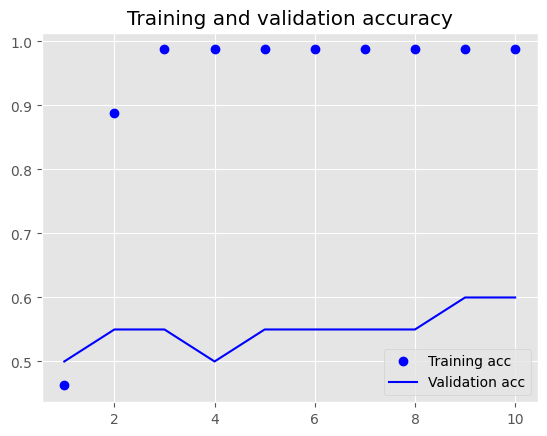

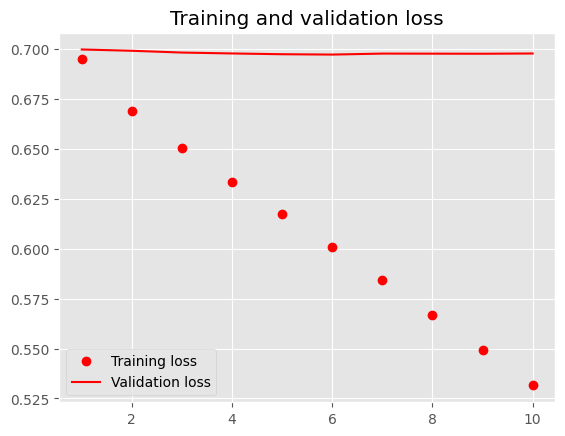

In [4]:
import matplotlib.pyplot as plt

# Training accuracy
acc = history.history["acc"]
# Validation accuracy
valid_accuracy = history.history["val_acc"]
# Training loss
loss = history.history["loss"]
# Validation loss
valid_loss = history.history["val_loss"]

#plots every epoch, here 10
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, valid_accuracy, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, valid_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()



In [5]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.4963 - loss: 0.6949
Test loss: 0.6949307918548584
Test accuracy: 0.4917599856853485


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.4625 - loss: 0.6937 - val_acc: 0.5300 - val_loss: 0.6922
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8537 - loss: 0.6741 - val_acc: 0.5900 - val_loss: 0.6913
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9479 - loss: 0.6573 - val_acc: 0.5700 - val_loss: 0.6903
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9553 - loss: 0.6389 - val_acc: 0.5600 - val_loss: 0.6897
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9617 - loss: 0.6182 - val_acc: 0.5500 - val_loss: 0.6892
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9682 - loss: 0.5929 - val_acc: 0.5300 - val_loss: 0.6886
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9846 - loss: 0.5642 - val_acc: 0.5300 - val_loss: 0.6884
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9857 - loss: 0.5327 - val_acc: 0.5300 - val_loss: 0.6880
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9749 - loss:

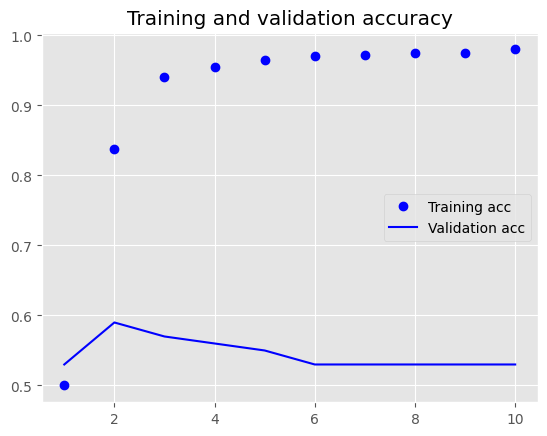

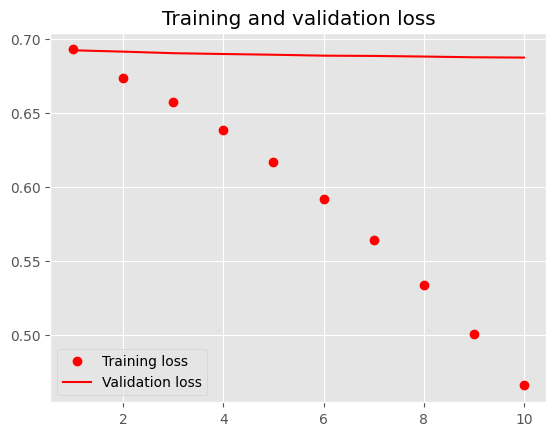

In [6]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
maximum_features = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maximum_features)

x_train = x_train[:500]
y_train = y_train[:500]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=max_len))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.
# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
valid_accuracy = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
valid_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, valid_accuracy, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, valid_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [7]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.5251 - loss: 0.6912
Test loss: 0.6914879679679871
Test accuracy: 0.5238400101661682


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.4918 - loss: 0.6939 - val_acc: 0.5350 - val_loss: 0.6924
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7675 - loss: 0.6767 - val_acc: 0.5350 - val_loss: 0.6913
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8919 - loss: 0.6612 - val_acc: 0.5350 - val_loss: 0.6900
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9364 - loss: 0.6404 - val_acc: 0.5200 - val_loss: 0.6885
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9546 - loss: 0.6140 - val_acc: 0.5350 - val_loss: 0.6866
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9597 - loss: 0.5830 - val_acc: 0.5450 - val_loss: 0.6846
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9491 - loss: 0.5500 - val_acc: 0.5400 - val_loss: 0.6825
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9678 - loss: 0.5054 - val_acc: 0.5550 - val_loss: 0.6804
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9772 - loss:

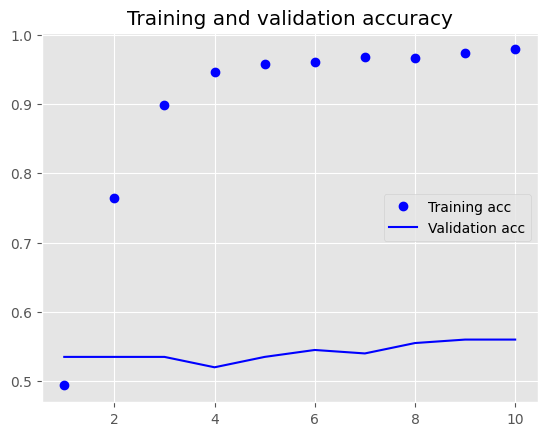

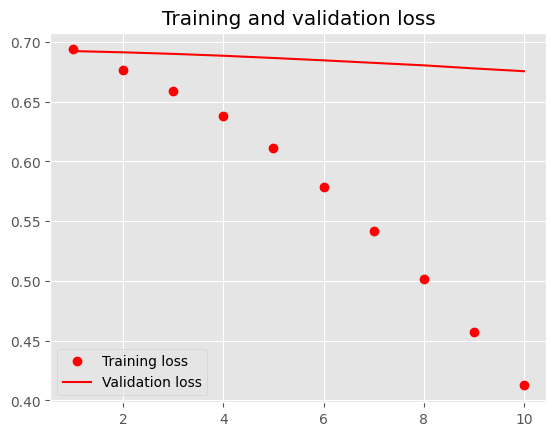

In [8]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
maximum_features = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maximum_features)

x_train = x_train[:1000]
y_train = y_train[:1000]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=max_len))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
valid_accuracy = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
valid_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, valid_accuracy, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, valid_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [9]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.5334 - loss: 0.6894
Test loss: 0.6899557709693909
Test accuracy: 0.5333600044250488


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.5274 - loss: 0.6897 - val_acc: 0.6775 - val_loss: 0.6492
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7751 - loss: 0.5912 - val_acc: 0.7935 - val_loss: 0.4811
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8485 - loss: 0.4142 - val_acc: 0.8475 - val_loss: 0.3729
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8884 - loss: 0.3064 - val_acc: 0.8325 - val_loss: 0.3575
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9158 - loss: 0.2448 - val_acc: 0.8575 - val_loss: 0.3294
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9328 - loss: 0.2045 - val_acc: 0.8660 - val_loss: 0.3222
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.9534 - loss: 0.1611 - val_acc: 0.8665 - val_loss: 0.3179
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.9585 - loss: 0.1391 - val_acc: 0.8520 - val_loss: 0.3423
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - ac

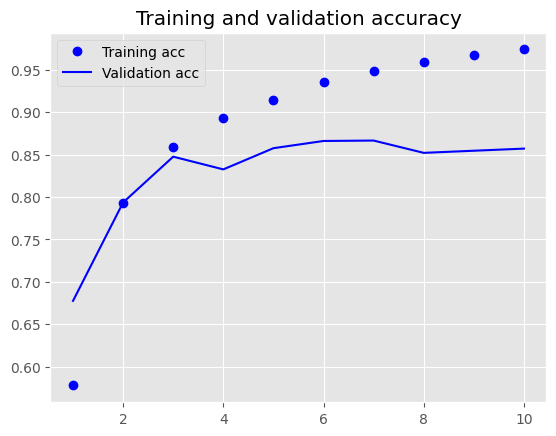

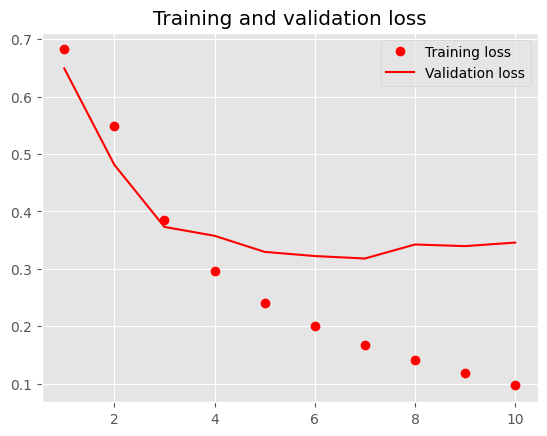

In [10]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
maximum_features = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maximum_features)

x_train = x_train[:10000]
y_train = y_train[:10000]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=max_len))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
valid_accuracy = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
valid_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, valid_accuracy, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, valid_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()



In [11]:
test_loss, T_accuracy_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8518 - loss: 0.3509
Test loss: 0.3490924537181854
Test accuracy: 0.5333600044250488


In [12]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  9169k      0  0:00:08  0:00:08 --:--:-- 13.4M


In [13]:
import os
import shutil

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

If the available training data is insufficient to effectively learn word embeddings for your specific problem, you can utilize pretrained word embeddings.

The training review labels (positive or negative) are compiled into a list, while the training reviews themselves are organized as a list of strings, with each string representing a single review.

Data tokenization

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

maxlen = 150 # cuts off review after 150 words
training_samples = 100 # Trains on 100 samples
validation_samples = 10000 # Validates 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index    # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


**Downloading and preparing the word embedding for Glove**

In [15]:
import numpy as np
import requests
from io import BytesIO
import zipfile  # importing zipfile module

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


An embedding matrix is then required to be incorporated into an embedding layer. This matrix should have dimensions of (maximum words, embedding dimension), specifically 10,000 × 100. In comparison, GloVe embeddings have dimensions of 100 × 400,000.


Configuring the word embedding matrix using GloVe.

In [16]:
embedding_dimension = 100

embedding_matrix = np.zeros((max_words, embedding_dimension))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [17]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dimension, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# Add the Embedding layer with initial weights and set trainable to False
model.add(Embedding(max_words, embedding_dimension, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

In [19]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


By incorporating pretrained word embeddings into the Embedding layer, we can set the trainable parameter to False to ensure that the Embedding layer remains untrainable when used. If trainable is set to True, the optimization process can modify the word embedding parameters. To preserve the knowledge within pretrained embeddings, it is advisable to delay updating them until the training process is complete.

In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.weights.h5')

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 523ms/step - acc: 0.4257 - loss: 3.1680 - val_acc: 0.5008 - val_loss: 0.7942
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 877ms/step - acc: 0.6093 - loss: 0.5720 - val_acc: 0.5520 - val_loss: 0.6890
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 876ms/step - acc: 0.7937 - loss: 0.4672 - val_acc: 0.5021 - val_loss: 1.2816
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 554ms/step - acc: 0.7313 - loss: 0.5555 - val_acc: 0.5150 - val_loss: 0.7660
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 873ms/step - acc: 0.9939 - loss: 0.2525 - val_acc: 0.5142 - val_loss: 0.8727
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 437ms/step - acc: 0.9599 - loss: 0.2431 - val_acc: 0.5677 - val_loss: 0.6932
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - acc: 1.0000 - loss: 0.1224 - val_acc: 0.5694 - val_loss: 0.6898
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/step - acc: 1.0000 - loss: 0.0933 - val_acc: 0.4994 - val_loss: 1.0642
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 436ms/step - acc: 0.9845 - loss: 

As anticipated due to the small amount of training data, the model quickly overfits. The significant fluctuations in validation accuracy are also a result of this limitation.

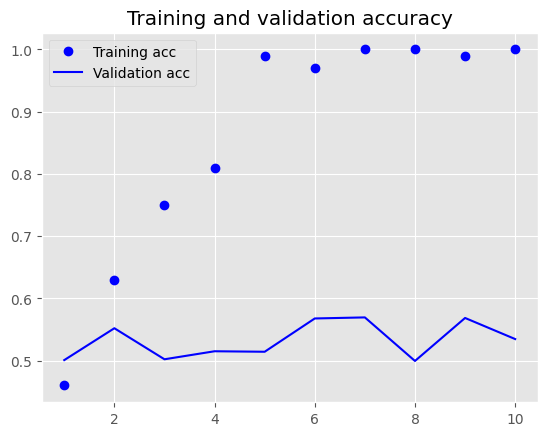

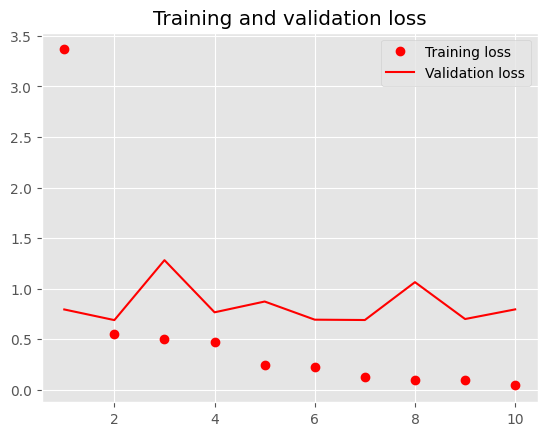

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
valid_accuracy = history.history['val_acc']
loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.4986 - loss: 0.8689
Test loss: 0.8634483814239502
Test accuracy: 0.5052000284194946


In [23]:
!pip install tensorflow
# Install tensorflow-text if not already installed
!pip install tensorflow-text

from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras
from tensorflow.keras.utils import pad_sequences # Import pad_sequences from tensorflow.keras
import numpy as np

max_len = 150 # cuts off review after 150 words
training_samples = 500 # Trains on 500 samples
validation_samples = 10000 # Validates 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index    # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=max_len)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [24]:
indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [25]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# The embeddings_initializer argument is used to initialize the embedding layer with the pretrained weights.
model.add(Embedding(max_words, embedding_dim, embeddings_initializer='uniform', input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# This line is no longer needed if you use embeddings_initializer when declaring the layer.
#model.layers[0].set_weights([embedding_matrix])
# The trainable attribute of the embedding layer is set to False to prevent the weights from being updated during training.
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.weights.h5') # Changed the filename to include .weights.h5

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - acc: 0.4775 - loss: 0.6952 - val_acc: 0.4972 - val_loss: 0.6938
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 286ms/step - acc: 0.8930 - loss: 0.5981 - val_acc: 0.4974 - val_loss: 0.6966
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - acc: 0.9624 - loss: 0.4623 - val_acc: 0.5003 - val_loss: 0.7074
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - acc: 0.9565 - loss: 0.3380 - val_acc: 0.4993 - val_loss: 0.7131
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - acc: 0.9919 - loss: 0.2411 - val_acc: 0.5019 - val_loss: 0.7403
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - acc: 0.9877 - loss: 0.1712 - val_acc: 0.5003 - val_loss: 0.7735
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - acc: 0.9994 - loss: 0.1244 - val_acc: 0.5047 - val_loss: 0.7397
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - acc: 1.0000 - loss: 0.0967 - val_acc: 0.5026 - val_loss: 0.7689
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - acc: 0.99

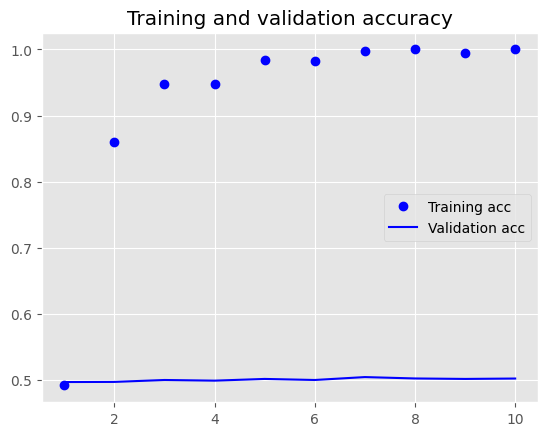

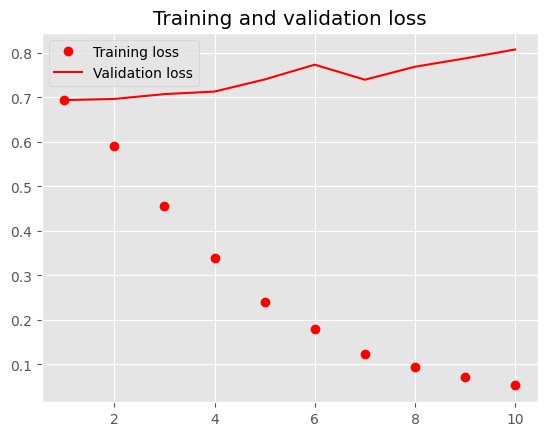

In [26]:


import matplotlib.pyplot as plt

acc = history.history['acc']
valid_accuracy = history.history['val_acc']
loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.4984 - loss: 0.8044
Test loss: 0.8068321347236633
Test accuracy: 0.49612000584602356


In [28]:
!pip install keras
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np


maxlen = 150 # cuts off review after 150 words
training_samples = 1000 #Trains on 1000 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index      # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [29]:
indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [30]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# Add weights parameter and set trainable to False
model.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Remove the line that attempts to set weights manually
# model.layers[0].set_weights([embedding_matrix]) # This line is causing the error. Remove it.
# model.layers[0].trainable = False # This is already set in the Embedding layer initialization

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.weights.h5') # Changed the filename to include .weights.h5



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - acc: 0.4748 - loss: 1.6957 - val_acc: 0.4966 - val_loss: 0.6933
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - acc: 0.5488 - loss: 0.7043 - val_acc: 0.4976 - val_loss: 0.7037
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - acc: 0.6041 - loss: 0.6425 - val_acc: 0.5006 - val_loss: 0.7203
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.6424 - loss: 0.5850 - val_acc: 0.5082 - val_loss: 0.7255
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - acc: 0.7340 - loss: 0.5748 - val_acc: 0.4951 - val_loss: 0.8682
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.8212 - loss: 0.4233 - val_acc: 0.4957 - val_loss: 0.7875
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - acc: 0.8994 - loss: 0.2983 - val_acc: 0.5012 - val_loss: 0.8395
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - acc: 0.8919 - loss: 0.3026 - val_acc: 0.4970 - val_loss: 1.0729
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - acc: 0.947

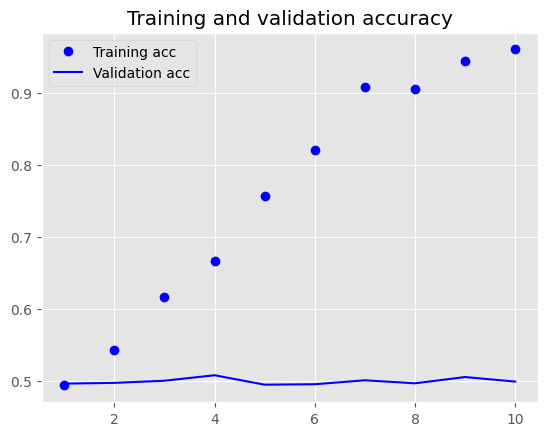

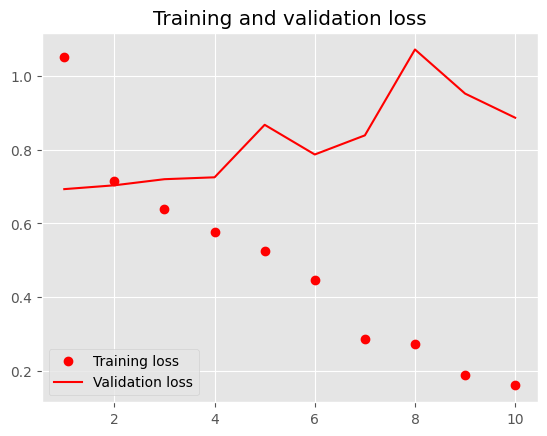

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
valid_accuracy = history.history['val_acc']
loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.4900 - loss: 0.8912
Test loss: 0.8929299712181091
Test accuracy: 0.49079999327659607


In [33]:
!pip install tensorflow
!pip install keras

from tensorflow.keras.preprocessing.text import Tokenizer #Updated to get Tokenizer from tensorflow.keras
from keras.utils import pad_sequences
import numpy as np

max_len = 150 # cuts off review after 150 words
training_samples = 10000 # Trains on 10000 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index       # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [34]:
indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [35]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# Add weights parameter and set trainable to False during initialization
model.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Remove the line that attempts to set weights manually
# model.layers[0].set_weights([embedding_matrix]) # This line is causing the error. Remove it.
# model.layers[0].trainable = False # This is already set in the Embedding layer initialization

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.weights.h5') # Changed the filename to include .weights.h5

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - acc: 0.4975 - loss: 0.7800 - val_acc: 0.5008 - val_loss: 0.6932
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - acc: 0.5066 - loss: 0.6961 - val_acc: 0.4982 - val_loss: 0.6943
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - acc: 0.5070 - loss: 0.6928 - val_acc: 0.4992 - val_loss: 0.6956
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - acc: 0.5447 - loss: 0.6771 - val_acc: 0.5009 - val_loss: 0.7002
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - acc: 0.5812 - loss: 0.6478 - val_acc: 0.4958 - val_loss: 0.7668
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - acc: 0.6287 - loss: 0.6078 - val_acc: 0.4973 - val_loss: 0.7647
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - acc: 0.6766 - loss: 0.5642 - val_acc: 0.4984 - val_loss: 0.7877
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - acc: 0.7210 - loss: 0.5160 - val_acc: 0.4972 - val_loss: 1.2892
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22m

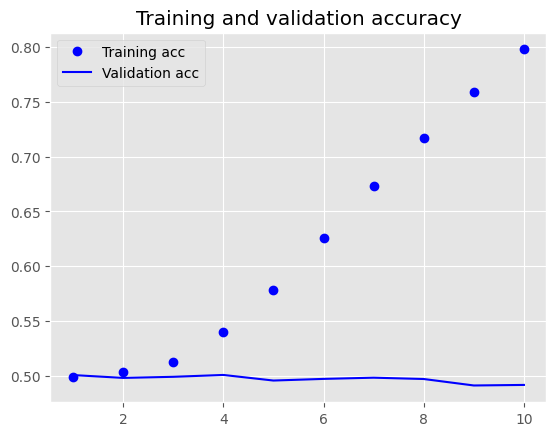

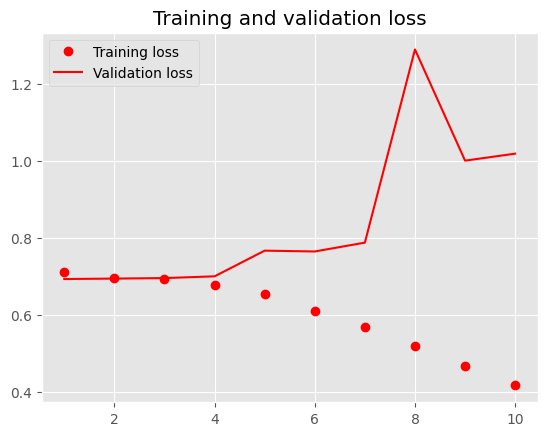

In [36]:
import matplotlib.pyplot as plt
acc = history.history['acc']
valid_accuracy = history.history['val_acc']
loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.5058 - loss: 0.9839
Test loss: 0.9926010966300964
Test accuracy: 0.503000020980835
